## Data Augmentation
Boost performance by creating extra training data.


### The Usefulness of Fake Data

The best way to improve the performance of a machine learning model is to train it on more data. The more examples the model has to learn from, the better it will be able to recognize which differences in images matter and which do not. More data helps the model to generalize better.

One easy way of getting more data is to use the data you already have. If we can transform the images in our dataset in ways that preserve the class, we can teach our classifier to ignore those kinds of transformations. For instance, whether a car is facing left or right in a photo doesn't change the fact that it is a Car and not a Truck. So, if we augment our training data with flipped images, our classifier will learn that "left or right" is a difference it should ignore.

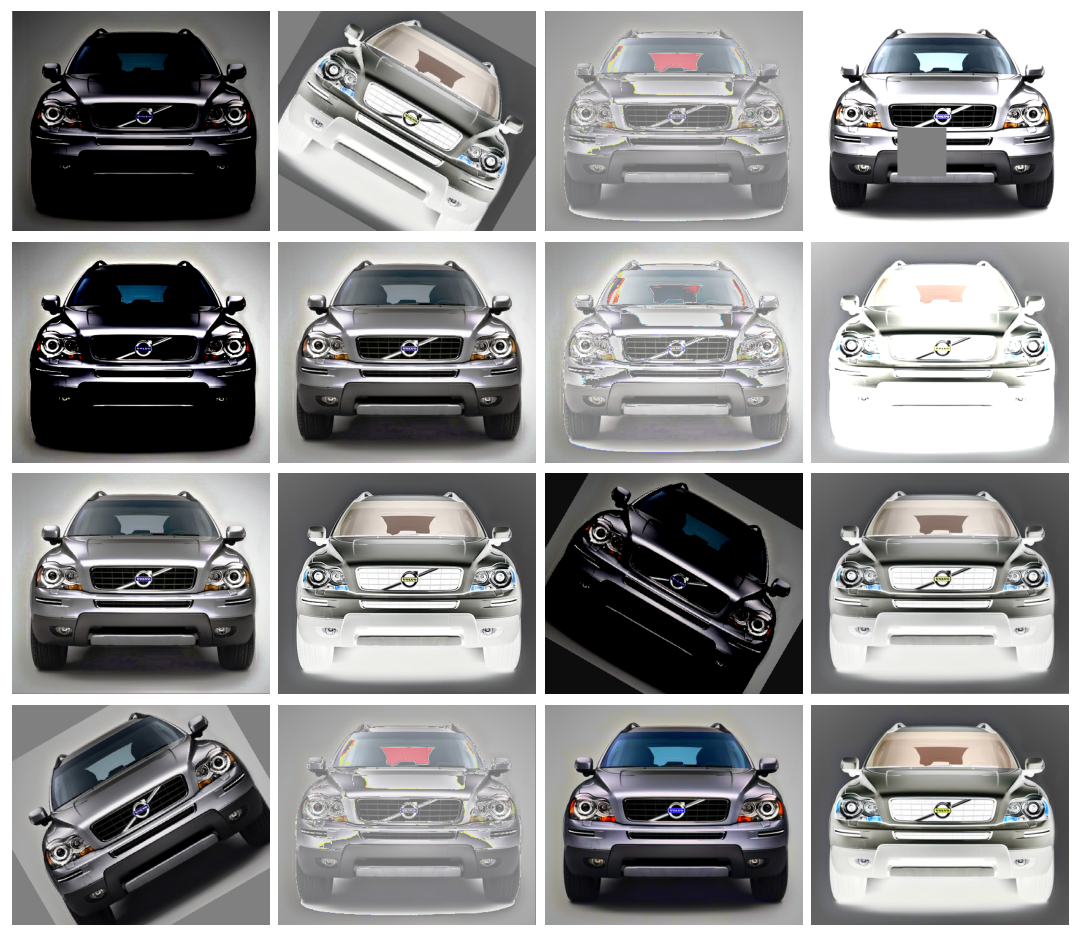

Data augmentation is usually done online, meaning, as the images are being fed into the network for training. Recall that training is usually done on mini-batches of data. This is what a batch of 16 images might look like when data augmentation is used.

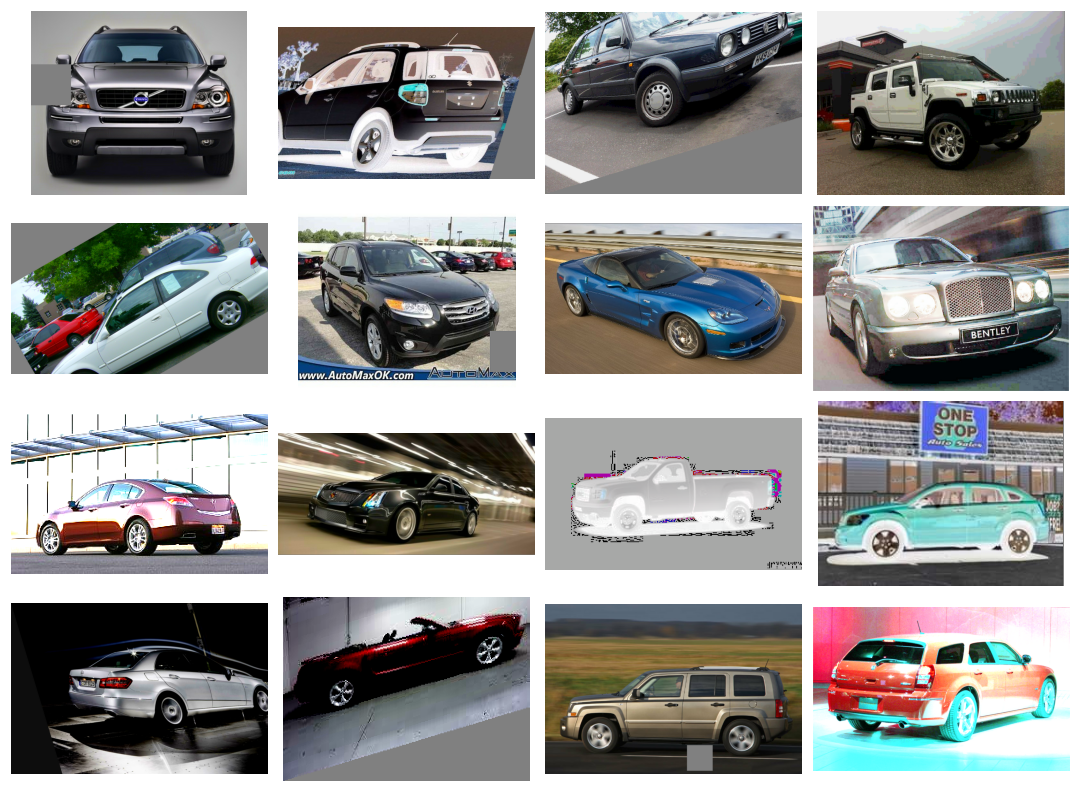

### Example 
Keras let's to augment the data in two ways. 
1. Include in the data pipeline with a function like `ImageDataGenrator`.
2. Include in the model definition by using Keras `preprocessing layers`.

The primary advantage for us is that the image transformations will be computed on the GPU instead of the CPU, potentially speeding up training.

```python
from tensorflow import keras
from tensorflow.keras import layers
# these are a new feature in TF 2.2
from tensorflow.keras.layers.experimental import preprocessing


pretrained_base = tf.keras.models.load_model(
    '../input/cv-course-models/cv-course-models/vgg16-pretrained-base',
)
pretrained_base.trainable = False

model = keras.Sequential([
    # Preprocessing
    preprocessing.RandomFlip('horizontal'), # flip left-to-right
    preprocessing.RandomContrast(0.5), # contrast change by up to 50%
    # Base
    pretrained_base,
    # Head
    layers.Flatten(),
    layers.Dense(6, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=30,
    verbose=0,
)

```